<bound method NDFrame.head of        label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28

C:\Users\nikun\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8378 - loss: 0.6420
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9036 - loss: 0.3429
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9156 - loss: 0.2958
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9252 - loss: 0.2656
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9323 - loss: 0.2424
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9375 - loss: 0.2231
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9423 - loss: 0.2065
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9462 - loss: 0.1923
Epoch 9/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9494 - loss: 0.1800
Epoch 10/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9525 - loss: 0.1691
Epoch 11/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9554 - loss: 0.1594
Test Accuracy: 0.9539, Test Loss: 0.1569


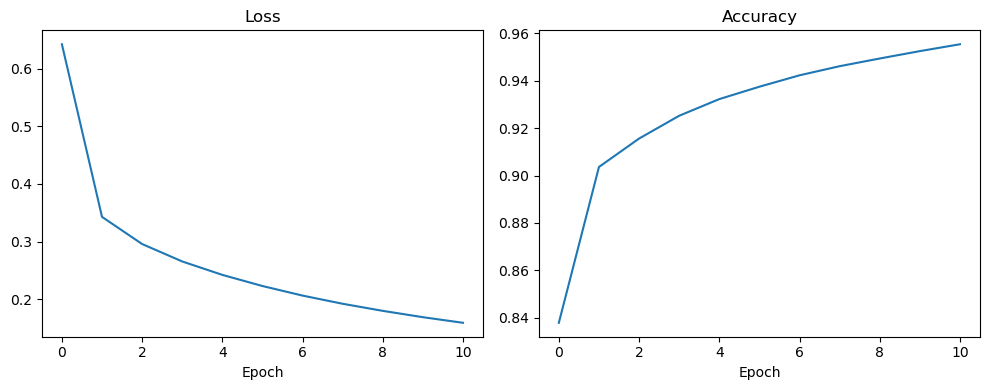

In [7]:
# a. Import necessary packages
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# b. Load and preprocess data
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')


print(train.head)

x_train = train.iloc[:, 1:].astype('float32') / 255.0
y_train = train.iloc[:, 0]
x_test = test.iloc[:, 1:].astype('float32') / 255.0
y_test = test.iloc[:, 0]

# 🔹 reshape to (28,28)
x_train = x_train.values.reshape(-1, 28, 28 , 1)
x_test = x_test.values.reshape(-1, 28, 28 , 1)

# c. Define feedforward network
model = Sequential([
    Flatten(input_shape=(28, 28 , 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# d. Compile and train model (SGD, 11 epochs)
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=11, verbose=1)

# e. Evaluate model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

# f. Plot training loss and accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(history.history['loss']); plt.title('Loss'); plt.xlabel('Epoch')
plt.subplot(1,2,2); plt.plot(history.history['accuracy']); plt.title('Accuracy'); plt.xlabel('Epoch')
plt.tight_layout(); plt.show()


In [1]:
!pip install tensorflow

Access is denied.


In [5]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

print('loading train')
train = pd.read_csv('train_data.csv')
print('loadde train')
test = pd.read_csv('test_data.csv')
print('loaded both')
print(train.head())
print(train.shape)

xtrain = train.iloc[:, :-1].astype('float32') / 255.0
ytrain = train.iloc[:, -1]
xtest = test.iloc[:, :-1:].astype('float32') / 255.0
ytest = test.iloc[:, -1]

xtrain = xtrain.values.reshape(-1, 32, 32, 3)
xtest = xtest.values.reshape(-1, 32, 32, 3)

model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, epochs=15)
loss, acc = model.evaluate(xtest, ytest)
print("Test Loss:", loss)
print("Test Accuracy:", acc)



loading train
loadde train
loaded both
<bound method NDFrame.head of        pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0           59       62       63       43       46       45       50       48   
1          154      177      187      126      137      136      105      104   
2          255      255      255      253      253      253      253      253   
3           28       25       10       37       34       19       38       35   
4          170      180      198      168      178      196      177      185   
...        ...      ...      ...      ...      ...      ...      ...      ...   
49995      145      161      194      151      166      199      156      171   
49996      255      245      132      254      247      134      255      249   
49997       35      178      235       40      176      239       42      176   
49998      189      211      240      186      208      236      185      207   
49999      229      229      239      23

C:\Users\nikun\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3210 - loss: 1.8915
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3934 - loss: 1.7168
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4216 - loss: 1.6441
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4376 - loss: 1.5973
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4519 - loss: 1.5597
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4631 - loss: 1.5302
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4755 - loss: 1.5019
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4836 - loss: 1.4793
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4902 - loss: 1.4570
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4968 - loss: 1.4384
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5034 - loss: 1.4204
Epoch 12/15
1563/1563 ━━━━━━━━